In [5]:
import numpy as np
import pandas as pd

# For plotting maps
import folium

# For Regular Expressions
import re

# For working with geographical data
import geopandas

# For plotting in python
import matplotlib
import matplotlib.pyplot as plt
m=folium.Map(location=[30.033333, 31.233334])
m

In [19]:
df_poll = geopandas.read_file("../Data/Facilities/DemoCairo.gpkg", layer='pollutionAdmin').to_crs("EPSG:3857")
df_poll.head()

,id,type,lat,lon,timestamp,effect,description,img,solved,solved_time,...,ADM1_PCODE,ADM0_EN,ADM0_AR,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,geometry
0,12.0,6,29.986436,31.451659,2021-12-01T00:00:00,4,None,None,False,None,...,EG01,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.193563,0.002009,POINT (3501182.678 3501806.445)
1,13.0,6,30.028268,31.407303,2022-01-01T00:00:00,2,None,None,False,None,...,EG01,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.293443,0.002997,POINT (3496245.001 3507183.915)
2,14.0,6,30.013730,31.494848,2022-02-01T00:00:00,3,None,None,False,None,...,EG01,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.156671,0.001334,POINT (3505990.416 3505314.794)
3,15.0,6,30.010386,31.406675,2022-03-01T00:00:00,2,None,None,False,None,...,EG01,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.140995,0.001107,POINT (3496175.034 3504884.997)
4,16.0,6,29.986203,31.442231,2020-10-01T00:00:00,2,None,None,False,None,...,EG01,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.146695,0.000691,POINT (3500133.172 3501776.459)


In [20]:
NewCairoPoly_Geojson= geopandas.read_file("../Data/NewCairoPoly.geojson")
NewCairoPoly_Geojson.head()

,ADM3_EN,ADM3_AR,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM3ALT1AR,ADM3ALT2AR,ADM2_EN,ADM2_AR,...,ADM1_PCODE,ADM0_EN,ADM0_AR,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,geometry
0,None,Mubarak housing for youth,EG013902,None,None,None,None,None,New Cairo-3,قسم ثالث القاهرة الجديدة,...,EG01,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.146695,0.000691,"MULTIPOLYGON (((31.44780 29.97539, 31.42257 29..."
1,None,Police Academy and Merag,EG013803,None,None,None,None,None,New Cairo-2,قسم ثان القاهرة الجديدة,...,EG01,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.155351,0.001301,"MULTIPOLYGON (((31.45107 30.07614, 31.44928 30..."
2,None,Activities,EG013903,None,None,None,None,None,New Cairo-3,قسم ثالث القاهرة الجديدة,...,EG01,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.140649,0.000837,"MULTIPOLYGON (((31.41760 29.99413, 31.41831 29..."
3,None,Fifth Settlement,EG013701,None,None,None,None,None,New Cairo-1,قسم أول القاهرة الجديدة,...,EG01,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.140995,0.001107,"MULTIPOLYGON (((31.44686 29.99994, 31.44698 29..."
4,None,Al-Rehab and Mostasmeren,EG013801,None,None,None,None,None,New Cairo-2,قسم ثان القاهرة الجديدة,...,EG01,Egypt,مِصر,EG,2006-01-01,2017-04-21,None,0.268155,0.002957,"MULTIPOLYGON (((31.52336 30.04530, 31.52241 30..."


<AxesSubplot:>

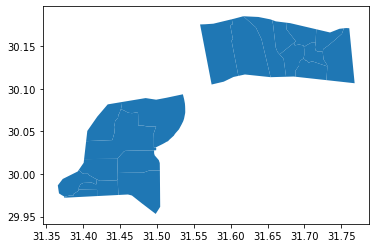

In [23]:
NewCairoPoly_Geojson.plot()

In [10]:
df_poll.isnull().sum()

id             20
type            0
lat             0
lon             0
timestamp       0
effect          0
description    44
img            44
solved          0
solved_time    44
sub-type        0
userid         44
ADM3_EN        44
ADM3_AR         0
ADM3_PCODE      0
ADM3_REF       44
ADM3ALT1EN     44
ADM3ALT2EN     44
ADM3ALT1AR     44
ADM3ALT2AR     44
ADM2_EN         0
ADM2_AR         0
ADM2_PCODE      0
ADM1_EN         0
ADM1_AR         0
ADM1_PCODE      0
ADM0_EN         0
ADM0_AR         0
ADM0_PCODE      0
date            0
validOn         0
validTo        44
Shape_Leng      0
Shape_Area      0
geometry        0
dtype: int64

In [11]:
df_poll.dtypes

id              float64
type              int64
lat             float64
lon             float64
timestamp        object
effect            int64
description      object
img              object
solved             bool
solved_time      object
sub-type         object
userid           object
ADM3_EN          object
ADM3_AR          object
ADM3_PCODE       object
ADM3_REF         object
ADM3ALT1EN       object
ADM3ALT2EN       object
ADM3ALT1AR       object
ADM3ALT2AR       object
ADM2_EN          object
ADM2_AR          object
ADM2_PCODE       object
ADM1_EN          object
ADM1_AR          object
ADM1_PCODE       object
ADM0_EN          object
ADM0_AR          object
ADM0_PCODE       object
date             object
validOn          object
validTo          object
Shape_Leng      float64
Shape_Area      float64
geometry       geometry
dtype: object

In [12]:
df_poll['timestamp']=pd.to_datetime(df_poll['timestamp']).apply(lambda x: x - pd.DateOffset(months=1))

In [24]:
df_poll['ADM3_AR'].unique()

array(['Industrial Area', 'Yasmin, Banafseg, Mostasmeren',
       'Al-Narges Mostasmeren Ganoby', 'Fifth Settlement',
       'Mubarak housing for youth', 'Police Academy and Merag',
       'Al-Rehab and Mostasmeren', 'Industrial Region East',
       'Industrial Region', 'El-Kattameya', 'Activities',
       'The Distinguished District', 'Badr 1'], dtype=object)

In [28]:
id_dict={'Mubarak housing for youth': '0',
'Police Academy and Merag': '1',
'Activities': '2',
'Fifth Settlement': '3',
'Al-Rehab and Mostasmeren': '4',
'Industrial Area': '5',
'El-Kattameya': '6',
'Al-Narges Mostasmeren Ganoby': '7',
'Yasmin, Banafseg, Mostasmeren': '8',
'First District and Garden A': '9',
'Third District and Garden B': '10',
'Second District': '11',
'Forth District': '12',
'The Distinguished District':'13',
'El-Shorouk 1': '14',
'El-Shorouk 2': '15',
'Industrial Region East': '16',
'Industrial Region': '17',
'Badr 1': '18'}

In [29]:
df_poll['Admin_id']=df_poll['ADM3_AR'].map(id_dict)

In [38]:
bins=np.linspace(min(df_poll['effect']),max(df_poll['effect']),5)
bins

array([1., 2., 3., 4., 5.])

In [40]:
# Coloring Admin with pollution
df_poll['color']=pd.cut(df_poll['effect'],bins,labels=['#EBA1A8','#DE6F7C','#D13E50','#C50D24'],include_lowest=False)
# Coloring Admin without pollution
df_poll['color'].replace(np.nan,'#32CD32',inplace=True)

In [42]:
df_poll=df_poll[['timestamp','Admin_id','color']]
df_poll.head()

,timestamp,Admin_id,color
0,2021-12-01T00:00:00,5,#D13E50
1,2022-01-01T00:00:00,8,#EBA1A8
2,2022-02-01T00:00:00,7,#DE6F7C
3,2022-03-01T00:00:00,3,#EBA1A8
4,2020-10-01T00:00:00,0,#EBA1A8


In [44]:
for date in df_poll['timestamp'].unique():
    diff=set([str(i) for i in range(18)])-set(df_poll[df_poll['timestamp']==date]['Admin_id'])
    for i in diff:
      df_poll=pd.concat([df_poll,pd.DataFrame([[date,'#0073CF',i]],columns=['timestamp','color','Admin_id'])],ignore_index=True)
df_poll.sort_values('timestamp',inplace=True)

In [50]:
df_poll['timestamp']=(df_poll['timestamp'])
poll_dict={}
for i in df_poll['Admin_id'].unique():
    poll_dict[i]={}
    for j in df_poll[df_poll['Admin_id']==i].set_index(['Admin_id']).values:   
        poll_dict[i][j[0]]={'color':j[1],'opacity':0.7}

In [47]:
list(poll_dict.items())[10]

('14',
 {'2020-05-21T00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2020-10-01T00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2020-11-01T00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2021-01-01T00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2021-01-14T00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2021-02-01T00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2021-02-17T00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2021-03-01T00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2021-04-01T00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2021-05-01T00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2021-06-01T00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2021-06-01T18:40:01': {'color': '#0073CF', 'opacity': 0.7},
  '2021-06-15T00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2021-07-01T00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2021-08-01T00:00:00': {'color': '#0073CF', 'opacity': 0.7},
  '2021-09-01T00:00:00': {'color': '#0073CF', 'o